# Numerical simulations

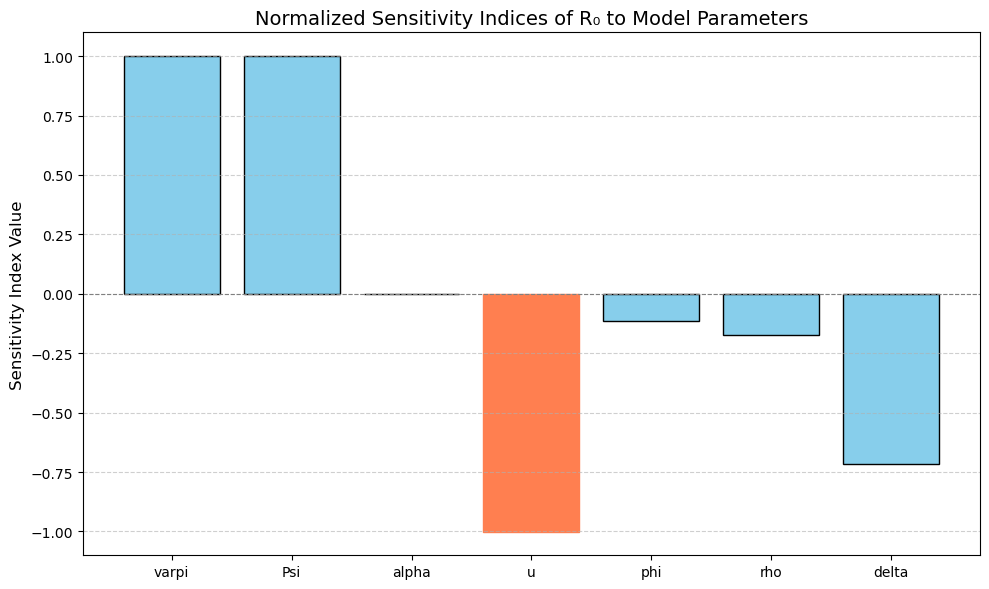

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Parameter values
Psi = 0.001       # Recruitment rate
varpi = 0.2       # Transmission rate
alpha = 0.143     # Progression rate from exposed to infectious
phi = 0.1         # Recovery rate from infectious
rho = 0.15        # Disease-induced death rate
u = 0.000038      # Natural death rate
delta = 0.1       # Dust decay rate

# Compute the two terms of R0
denominator1 = u * (alpha + u) * (phi + rho + u)
denominator2 = u * delta

term1 = (varpi * Psi * alpha) / denominator1
term2 = (varpi * Psi) / denominator2

R0 = term1 + term2

# Compute sensitivity indices analytically
sensitivity_indices = {
    'varpi': 1,
    'Psi': 1,
    'alpha': (alpha / R0) * (varpi * Psi / ((alpha + u)**2 * (phi + rho + u))),
    'u': (u / R0) * (
        - (varpi * Psi * alpha) / (u**2 * (alpha + u) * (phi + rho + u))
        - (varpi * Psi * alpha) / (u * (alpha + u)**2 * (phi + rho + u))
        - (varpi * Psi * alpha) / (u * (alpha + u) * (phi + rho + u)**2)
        - (varpi * Psi) / (u**2 * delta)
    ),
    'phi': - (phi / R0) * (varpi * Psi * alpha) / (u * (alpha + u) * (phi + rho + u)**2),
    'rho': - (rho / R0) * (varpi * Psi * alpha) / (u * (alpha + u) * (phi + rho + u)**2),
    'delta': - (delta / R0) * (varpi * Psi) / (u * delta**2)
}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sensitivity_indices.keys(), sensitivity_indices.values(),
               color='skyblue', edgecolor='black')

# Highlight the parameter with the greatest influence
max_index = np.argmax(np.abs(list(sensitivity_indices.values())))
bars[max_index].set_color('coral')

# Annotate plot
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Normalized Sensitivity Indices of R₀ to Model Parameters', fontsize=14)
plt.ylabel('Sensitivity Index Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


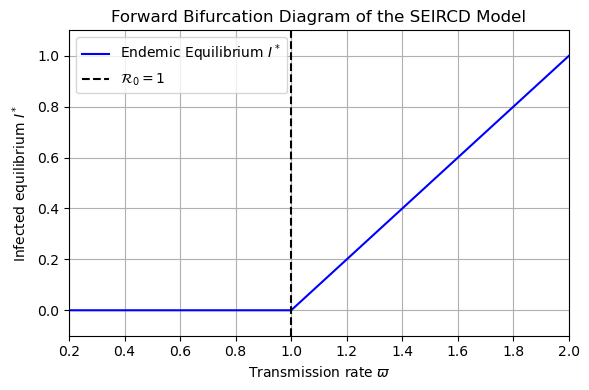

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
varpi = np.linspace(0.2, 2, 500)
I_star = np.piecewise(varpi, [varpi < 1, varpi >= 1],
                      [0, lambda v: (v - 1)])  # Simplified for illustration

# Plot
plt.figure(figsize=(6, 4))
plt.plot(varpi, I_star, label='Endemic Equilibrium $I^*$', color='blue')
plt.axvline(x=1, linestyle='--', color='black', label=r'$\mathcal{R}_0 = 1$')
plt.xlim(0.2, 2)
plt.ylim(-0.1, max(I_star)*1.1)
plt.xlabel(r'Transmission rate $\varpi$')
plt.ylabel(r'Infected equilibrium $I^*$')
plt.title('Forward Bifurcation Diagram of the SEIRCD Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/home/student28/Documents/Images-Thesis/Bifurcation Diagram.png', dpi=300)
plt.show()


Basic Reproduction Number (R0): 0.2542


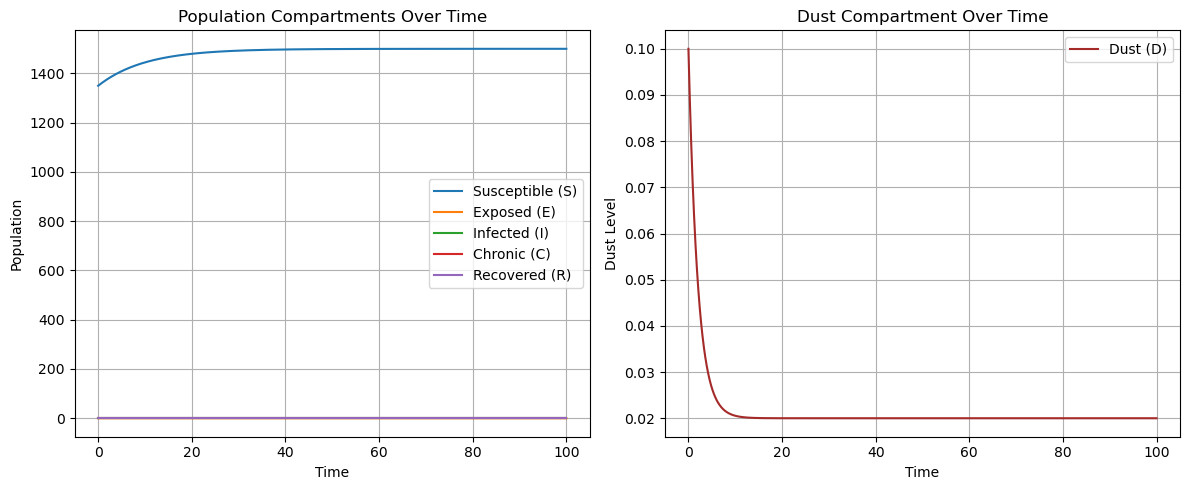

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters ensuring R0 < 1
Psi = 150  # Recruitment rate
u = 0.1    # Natural removal rate
varpi = 0.00005  # Transmission rate
alpha = 0.5      # Progression rate from exposed to infected
phi = 0.3        # Progression rate from infected to chronic
rho = 0.2        # Recovery rate
psi_disease = 0.4  # Disease-induced removal rate for chronic
theta = 0.01      # Dust introduction rate
delta = 0.5       # Dust removal rate

# Calculate R0
R0 = (varpi * Psi * alpha) / (u

 * (alpha + u) * (phi + rho + u)) + (varpi * Psi) / (u * delta)
print(f"Basic Reproduction Number (R0): {R0:.4f}")

# Define the ODE system
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi_disease + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions: Small dust, no infected individuals, S slightly below Psi/u
S0 = (Psi / u) * 0.9  # Start S at 90% of equilibrium
E0 = 0.0
I0 = 0.0
C0 = 0.0
R0 = 0.0
D0 = 0.1  # Small initial dust
initial_state = [S0, E0, I0, C0, R0, D0]

# Time vector
t = np.linspace(0, 100, 1000)

# Solve ODEs
solution = odeint(odes, initial_state, t, args=(Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta))

# Extract solutions
S, E, I, C, R, D = solution.T

# Create side-by-side plots
plt.figure(figsize=(12, 5))

# Population compartments plot
plt.subplot(1, 2, 1)
plt.plot(t, S, label='Susceptible (S)')
plt.plot(t, E, label='Exposed (E)')
plt.plot(t, I, label='Infected (I)')
plt.plot(t, C, label='Chronic (C)')
plt.plot(t, R, label='Recovered (R)')
plt.title('Population Compartments Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Dust compartment plot
plt.subplot(1, 2, 2)
plt.plot(t, D, label='Dust (D)', color='brown')
plt.title('Dust Compartment Over Time')
plt.xlabel('Time')
plt.ylabel('Dust Level')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('/home/student28/Documents/Images-Thesis/disease-free.png')
plt.show()

Basic Reproduction Number (R0): 531.6279


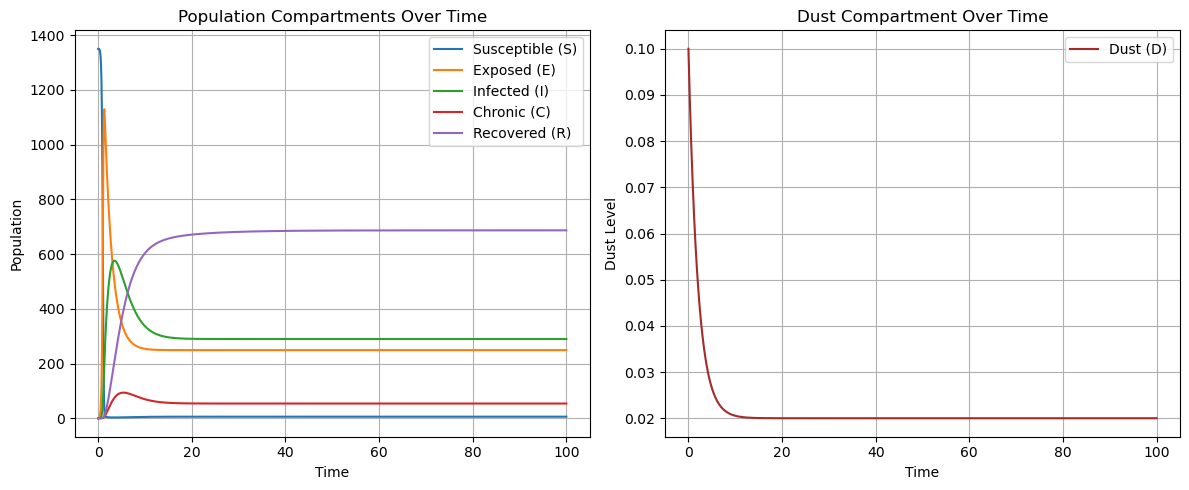

In [9]:
#ENDEMIC STATE
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters ensuring R0 < 1
Psi = 150  # Recruitment rate
u = 0.1    # Natural removal rate
varpi = 0.09  # Transmission rate
alpha = 0.5      # Progression rate from exposed to infected
phi = 0.13        # Progression rate from infected to chronic
rho = 0.2        # Recovery rate
psi_disease = 0.4  # Disease-induced removal rate for chronic
theta = 0.01      # Dust introduction rate
delta = 0.5       # Dust removal rate

# Calculate R0
R0 = (varpi * Psi * alpha) / (u

 * (alpha + u) * (phi + rho + u)) + (varpi * Psi) / (u * delta)
print(f"Basic Reproduction Number (R0): {R0:.4f}")

# Define the ODE system
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi_disease + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions: Small dust, no infected individuals, S slightly below Psi/u
S0 = (Psi / u) * 0.9  # Start S at 90% of equilibrium
E0 = 0.0
I0 = 0.0
C0 = 0.0
R0 = 0.0
D0 = 0.1  # Small initial dust
initial_state = [S0, E0, I0, C0, R0, D0]

# Time vector
t = np.linspace(0, 100, 1000)

# Solve ODEs
solution = odeint(odes, initial_state, t, args=(Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta))

# Extract solutions
S, E, I, C, R, D = solution.T

# Create side-by-side plots
plt.figure(figsize=(12, 5))

# Population compartments plot
plt.subplot(1, 2, 1)
plt.plot(t, S, label='Susceptible (S)')
plt.plot(t, E, label='Exposed (E)')
plt.plot(t, I, label='Infected (I)')
plt.plot(t, C, label='Chronic (C)')
plt.plot(t, R, label='Recovered (R)')
plt.title('Population Compartments Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Dust compartment plot
plt.subplot(1, 2, 2)
plt.plot(t, D, label='Dust (D)', color='brown')
plt.title('Dust Compartment Over Time')
plt.xlabel('Time')
plt.ylabel('Dust Level')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('/home/student28/Documents/Images-Thesis/Endemic-Equilibrium.png')
plt.show()

Basic Reproduction Number (R0): 1825.0000


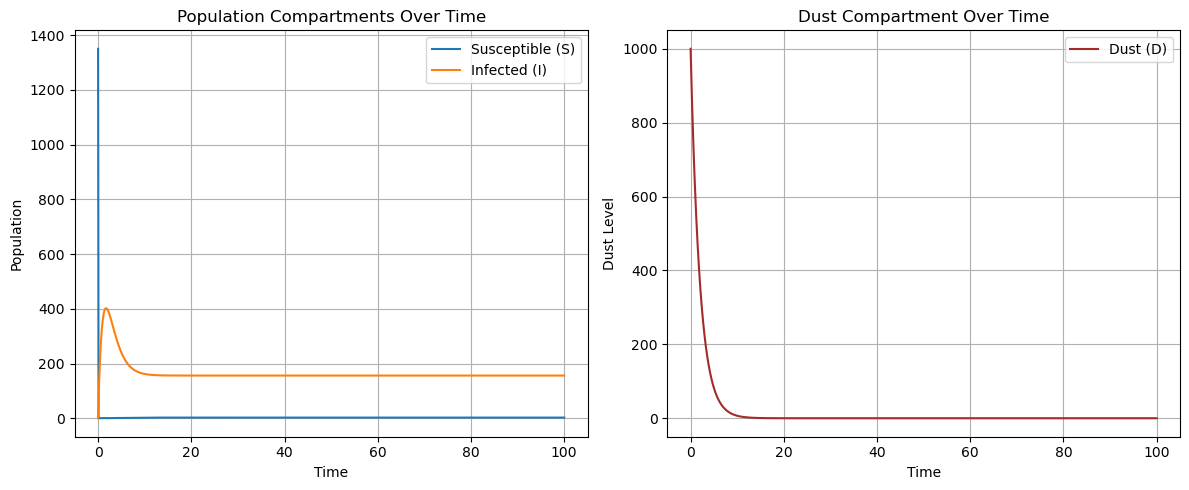

In [21]:
#PERTUBATION

#ENDEMIC STATE
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters ensuring R0 < 1
Psi = 150  # Recruitment rate
u = 0.1    # Natural removal rate
varpi = 0.4  # Transmission rate
alpha = 0.5      # Progression rate from exposed to infected
phi = 0.5 #0.13        # Progression rate from infected to chronic
rho = 0.2        # Recovery rate
psi_disease = 0.4  # Disease-induced removal rate for chronic
theta = 0.01      # Dust introduction rate
delta = 0.5       # Dust removal rate

# Calculate R0
R0 = (varpi * Psi * alpha) / (u

 * (alpha + u) * (phi + rho + u)) + (varpi * Psi) / (u * delta)
print(f"Basic Reproduction Number (R0): {R0:.4f}")

# Define the ODE system
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi_disease + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions: Small dust, no infected individuals, S slightly below Psi/u
S0 = (Psi / u) * 0.9  # Start S at 90% of equilibrium
E0 = 0.0
I0 = 0.0
C0 = 0.0
R0 = 0.0
D0 = 1000.0  # Small initial dust
initial_state = [S0, E0, I0, C0, R0, D0]

# Time vector
t = np.linspace(0, 100, 1000)

# Solve ODEs
solution = odeint(odes, initial_state, t, args=(Psi, varpi, u, alpha, phi, rho, psi_disease, theta, delta))

# Extract solutions
S, E, I, C, R, D = solution.T

# Create side-by-side plots
plt.figure(figsize=(12, 5))

# Population compartments plot
plt.subplot(1, 2, 1)
plt.plot(t, S, label='Susceptible (S)')
#plt.plot(t, E, label='Exposed (E)')
plt.plot(t, I, label='Infected (I)')
#plt.plot(t, C, label='Chronic (C)')
#plt.plot(t, R, label='Recovered (R)')
plt.title('Population Compartments Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Dust compartment plot
plt.subplot(1, 2, 2)
plt.plot(t, D, label='Dust (D)', color='brown')
plt.title('Dust Compartment Over Time')
plt.xlabel('Time')
plt.ylabel('Dust Level')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('compartments_side_by_side.png')
plt.show()

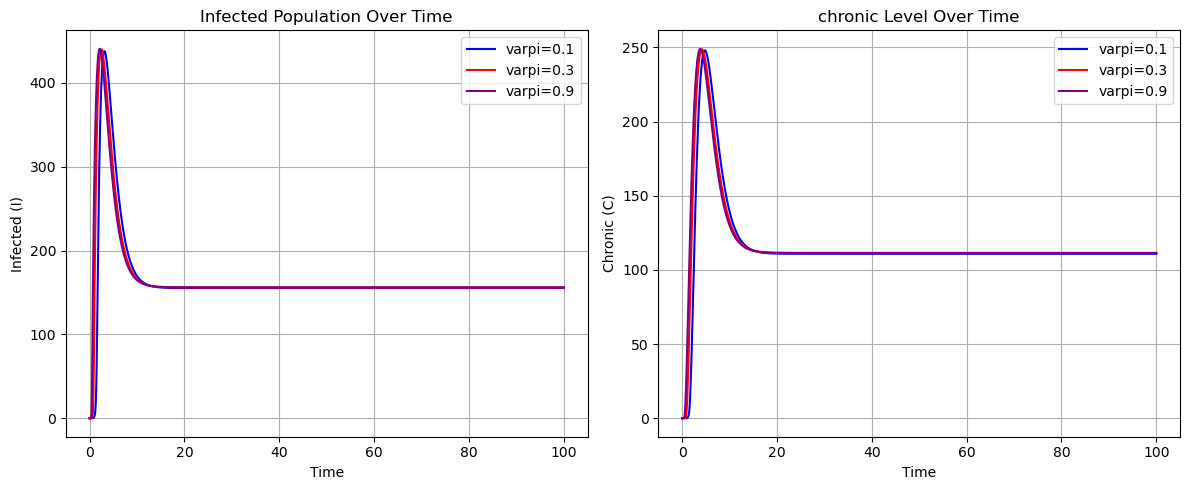

Basic Reproduction Number (R0): 4106.2500


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Fixed parameters
Psi = 150
u = 0.1
varpi = 0.9 # Transmission rate from infected
alpha = 0.5
phi = 0.5
rho = 0.2
psi = 0.4
theta = 0.01
delta = 0.5

# Define the ODE system with separated varpi_I and varpi_D
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions
S0 = (Psi / u)
initial_state = [S0, 0.0, 0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 100, 1000)

# Values of varpi_D to test
varpi_values = [0.1, 0.3, 0.9]
colors = ['blue', 'red', 'purple']

plt.figure(figsize=(12, 5))

# Plot for population compartments
plt.subplot(1, 2, 1)
for i, varpi in enumerate(varpi_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, I, label=f'varpi={varpi}', color=colors[i])
plt.title('Infected Population Over Time')
plt.xlabel('Time')
plt.ylabel('Infected (I)')
plt.legend()
plt.grid(True)

# Plot for dust
plt.subplot(1, 2, 2)
for i, varpi in enumerate(varpi_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, C, label=f'varpi={varpi}', color=colors[i])
plt.title('chronic Level Over Time')
plt.xlabel('Time')
plt.ylabel('Chronic (C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig('/home/student28/Documents/Images-Thesis/perturbed_phi_on_I_and_D.png')
plt.show()

# Calculate R0
R0 = (varpi * Psi * alpha) / (u

 * (alpha + u) * (phi + rho + u)) + (varpi * Psi) / (u * delta)
print(f"Basic Reproduction Number (R0): {R0:.4f}")



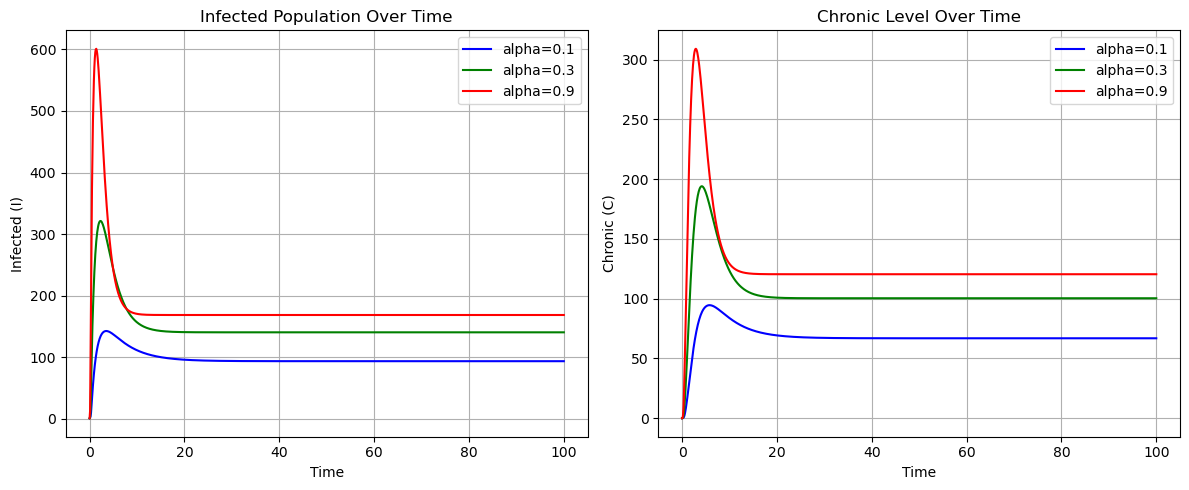

Basic Reproduction Number (R0): 4071.0938


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Fixed parameters (adjusted to match the graph)
Psi = 150
u = 0.1
varpi = 0.9  # Transmission rate from infected
phi = 0.5
rho = 0.2
psi = 0.4
theta = 0.01
delta = 0.5

# Define the ODE system
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions (adjusted to introduce initial infection)
S0 = (Psi / u)   # Slightly reduce S0 to account for initial infected
initial_state = [S0, 0.0, 1.0, 0.0, 0.0, 0.0]  # Start with I=1
t = np.linspace(0, 100, 1000)

# Values of alpha to test (as shown in the graph)
alpha_values = [0.1, 0.3, 0.9]
colors = ['blue', 'green', 'red']  # Match the colors in the graph

plt.figure(figsize=(12, 5))

# Plot for Infected Population (I)
plt.subplot(1, 2, 1)
for i, alpha in enumerate(alpha_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, I, label=f'alpha={alpha}', color=colors[i])
plt.title('Infected Population Over Time')
plt.xlabel('Time')
plt.ylabel('Infected (I)')
plt.legend()
plt.grid(True)

# Plot for Chronic Level (C)
plt.subplot(1, 2, 2)
for i, alpha in enumerate(alpha_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, C, label=f'alpha={alpha}', color=colors[i])
plt.title('Chronic Level Over Time')
plt.xlabel('Time')
plt.ylabel('Chronic (C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate R0 (adjusted to use alpha in the formula)
alpha_avg = np.mean(alpha_values)  # Use average alpha for R0 calculation
R0 = (varpi * Psi * alpha_avg) / (u * (alpha_avg + u) * (phi + rho + u)) + (varpi * Psi) / (u * delta)
print(f"Basic Reproduction Number (R0): {R0:.4f}")

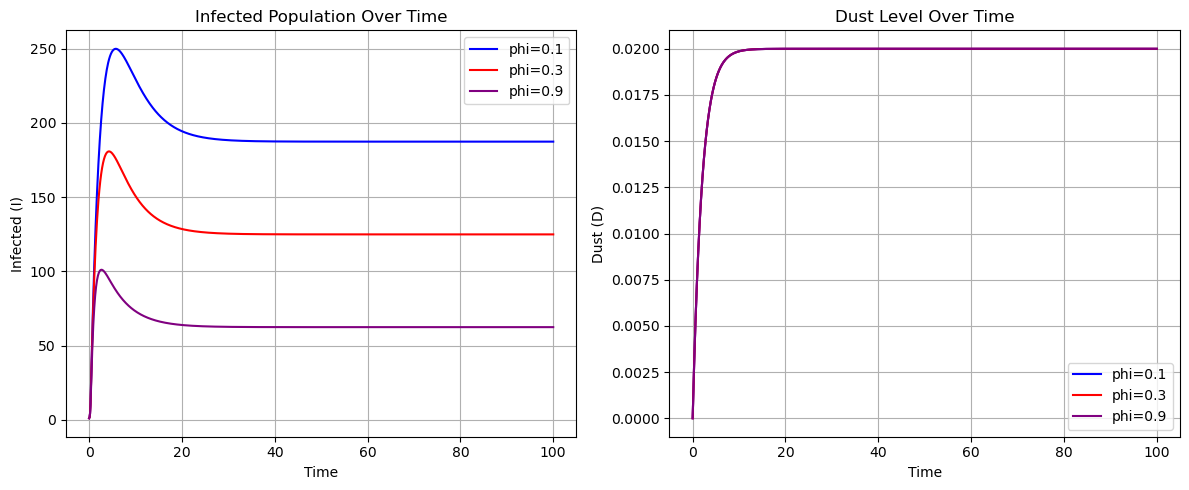

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Fixed parameters (adjusted to match the graph)
Psi = 150
u = 0.1
varpi = 0.9  # Transmission rate from infected
alpha = 0.1  # Using a fixed alpha value
rho = 0.2
psi = 0.4
theta = 0.01
delta = 0.5

# Define the ODE system
def odes(state, t, Psi, varpi, u, alpha, phi, rho, psi, theta, delta):
    S, E, I, C, R, D = state
    dSdt = Psi - varpi * D * S - varpi * I * S - u * S
    dEdt = varpi * D * S + varpi * I * S - (alpha + u) * E
    dIdt = alpha * E - (phi + rho + u) * I
    dCdt = phi * I - (psi + rho + u) * C
    dRdt = rho * I + rho * C - u * R
    dDdt = theta - delta * D
    return [dSdt, dEdt, dIdt, dCdt, dRdt, dDdt]

# Initial conditions
S0 = (Psi / u)
initial_state = [S0, 0.0, 1.0, 0.0, 0.0, 0.0]  # Start with I=1
t = np.linspace(0, 100, 1000)

# Values of phi to test (as shown in the graph)
phi_values = [0.1, 0.3, 0.9]
colors = ['blue', 'red', 'purple']  # Match the colors in the graph

plt.figure(figsize=(12, 5))

# Plot for Infected Population (I)
plt.subplot(1, 2, 1)
for i, phi in enumerate(phi_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, I, label=f'phi={phi}', color=colors[i])
plt.title('Infected Population Over Time')
plt.xlabel('Time')
plt.ylabel('Infected (I)')
plt.legend()
plt.grid(True)

# Plot for Dust Level (D)
plt.subplot(1, 2, 2)
for i, phi in enumerate(phi_values):
    sol = odeint(odes, initial_state, t,
                 args=(Psi, varpi, u, alpha, phi, rho, psi, theta, delta))
    S, E, I, C, R, D = sol.T
    plt.plot(t, D, label=f'phi={phi}', color=colors[i])
plt.title('Dust Level Over Time')
plt.xlabel('Time')
plt.ylabel('Dust (D)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()